In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rcParams['font.sans-serif'] = 'SimHei' # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False

In [2]:
project_path = os.path.join(os.getcwd(), os.pardir)
data_dir = os.path.join(project_path, 'data')
result_dir = os.path.join(project_path, 'result')
image_dir = os.path.join(project_path, 'image')

## task 2.1
绘制登记年份，产品来源，特医食品获批量的双折线图

In [3]:
df = pd.read_excel(os.path.join(result_dir, 'result2.xlsx'))

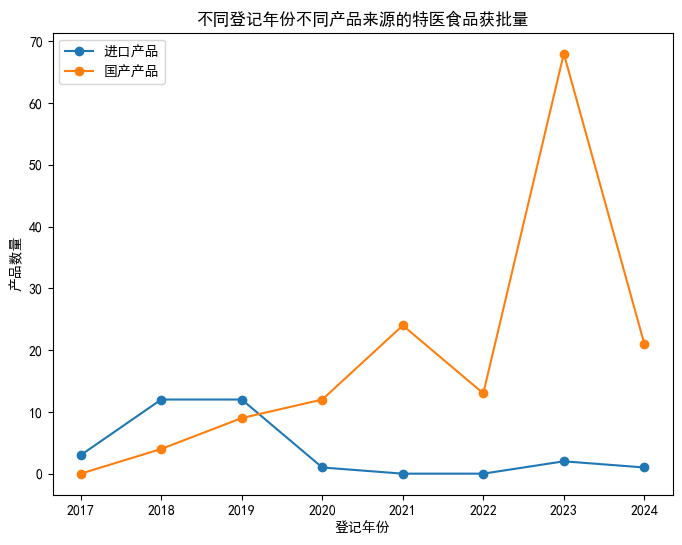

In [4]:
# 整理数据，首先根据登记年份和产品来源 groupby
by_year = df.groupby(['登记年份', '产品来源']).agg('size')
imports = by_year.xs('进口产品', level='产品来源')
domestics = by_year.xs('国产产品', level='产品来源')

# 发现 imports 2021,2022 年并未有获批，置为 0
imports.loc[2021] = 0
imports.loc[2022] = 0
imports.sort_index(inplace=True)
# domestics 2017 年未有获批，置为 0
domestics.loc[2017] = 0
domestics.sort_index(inplace=True)

# 绘制双折线图
plt.figure(figsize=(8,6))
plt.plot(imports.index, imports, label='进口产品', marker='o')
plt.plot(domestics.index, domestics, label='国产产品', marker='o')
plt.xlabel('登记年份')
plt.ylabel('产品数量')
plt.legend()
plt.title('不同登记年份不同产品来源的特医食品获批量')
plt.savefig(os.path.join(image_dir, 'task2_1.png'))

## task 2.2

In [37]:
df = pd.read_excel(os.path.join(result_dir, 'result2.xlsx'))

适用人群类别
1 岁以上特医食品    131
特医婴配食品        51
dtype: int64
适用人群类别     产品来源
1 岁以上特医食品  国产产品    124
           进口产品      7
特医婴配食品     国产产品     27
           进口产品     24
dtype: int64


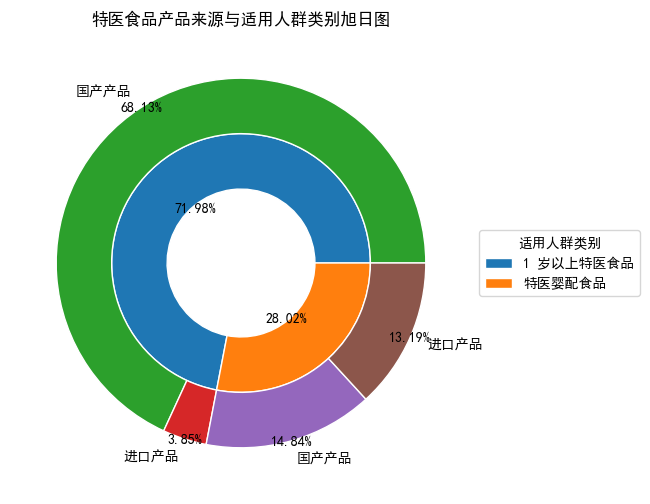

In [48]:
pre = df[['注册证号', '产品来源', '适用人群类别']]
wake = pre.groupby(['适用人群类别', '产品来源']).agg('size')
inner = pre.groupby('适用人群类别').agg('size')
print(inner)
print(wake)

fig, ax = plt.subplots(figsize=(8,6))

# 绘制内层环形图
labels1 = ['1 岁以上特医食品', '特医婴配食品']
wedges1, texts1, autotexts1 = ax.pie(inner,
       radius=0.7,
       autopct='%1.2f%%',
       pctdistance=0.55,
       wedgeprops=dict(width=0.3, edgecolor='w'))

# 绘制外层环形图
labels2 = ['国产产品', '进口产品', '国产产品', '进口产品']
wedges2, texts2, autotexts2 = ax.pie(wake,
       radius=1.0,
       autopct='%1.2f%%',
       pctdistance=1.0,
       labels=labels2,
       wedgeprops=dict(width=0.3, edgecolor='w'))

ax.legend(wedges1, labels1, title='适用人群类别', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# ax.text(0, 0, '内环：M101', ha='center', va='center', fontsize=12, fontweight='bold', color='gray')
# ax.text(0, 1.1, '外环：M102', ha='center', va='center', fontsize=12, fontweight='bold', color='gray')

plt.title('特医食品产品来源与适用人群类别旭日图')
plt.savefig(os.path.join(image_dir, 'task2_2.png'))

## task 2.3

In [5]:
###读取2的数据
data2_excel = pd.read_excel(os.path.join(result_dir, 'result2.xlsx')) 

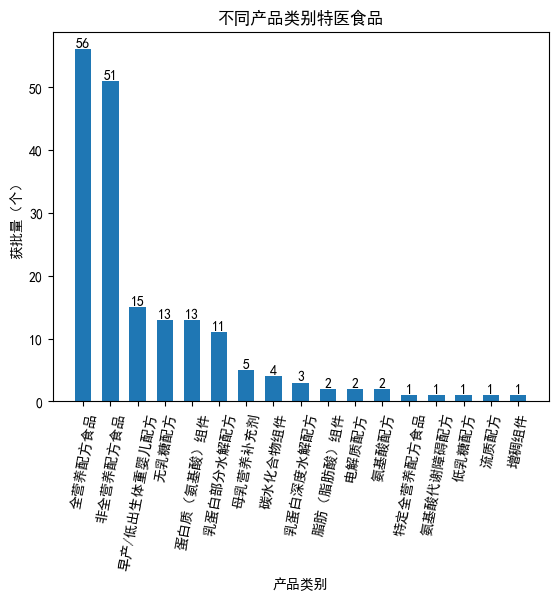

In [17]:
###记录产品数量

num = data2_excel['产品类别'].value_counts()

values = num[:len(num)]

columns = num.index.tolist()

plt.bar(columns, values, width=0.6) #绘制柱状图
plt.xticks(range(len(columns)), labels=columns, rotation=80)
plt.xlabel('产品类别')
plt.ylabel('获批量（个）')
plt.title('不同产品类别特医食品')

for i in range(len(columns)):
    plt.text(x=i, y=values.iloc[i], s=values.iloc[i], va='bottom', ha='center')

plt.savefig(os.path.join(image_dir, 'task2_3.png'))
plt.show()

## task 2.4

In [33]:
data1_excel = pd.read_excel(os.path.join(result_dir, 'result1.xlsx'))
df = data1_excel[['脂肪(g)','蛋白质(g)']]

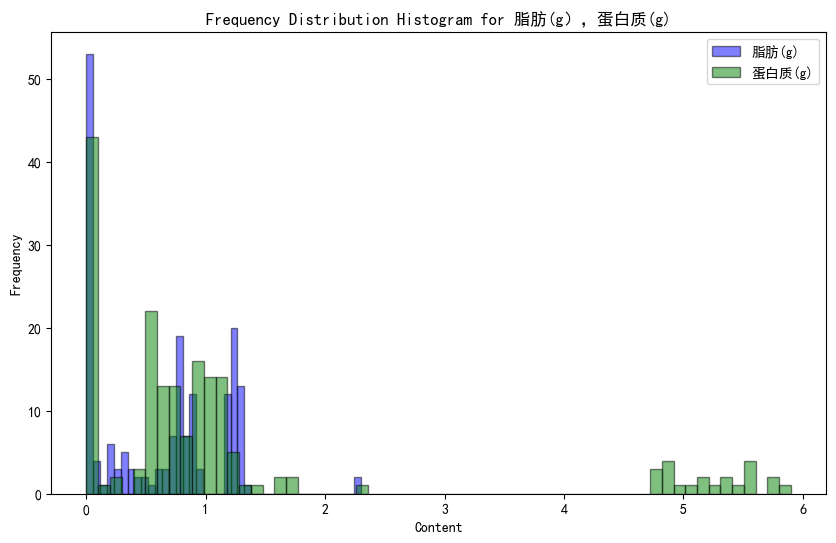

In [36]:
###绘制直方图
fig, ax = plt.subplots(1, 1, figsize=(10, 6))


df['脂肪(g)'].plot(kind='hist', bins=40, alpha=0.5, color='blue', edgecolor='black', ax=ax, label='脂肪(g)')



df['蛋白质(g)'].plot(kind='hist', bins=60, alpha=0.5, color='green', edgecolor='black', ax=ax, label='蛋白质(g)')
# 设置图表标题和标签
plt.title('Frequency Distribution Histogram for 脂肪(g），蛋白质(g)')
plt.xlabel('Content')
plt.ylabel('Frequency')
 
# 显示图例
plt.legend()

plt.savefig(os.path.join(image_dir, 'task2_4.png'))
# 显示图表
plt.show()

## task 2.5

In [ ]:
# !pip install wordcloud
# !pip install jieba

In [27]:
for x in data2_excel['适用人群'].value_counts().index:
    print(x)

10岁以上进食受限、消化吸收障碍、代谢紊乱等需要补充营养的人群
早产/低出生体重婴儿
10岁以上特定疾病或医学状况下需要补充蛋白质的人群
0～12月龄乳糖不耐受婴儿
0～12月龄乳蛋白过敏高风险婴儿
10岁以上因腹泻等原因导致轻至中度脱水需要补充水及电解质的人群
10岁以上术前需要补充碳水化合物的人群
于10岁以上进食受限、消化吸收障碍、代谢紊乱需要补充营养的人群
0～12月龄食物蛋白过敏婴儿
10岁以上特定疾病或医学状况下需要补充碳水化合物的人群
10岁以上需要限制脂肪摄入、消化吸收障碍等医学状况下的人群
于10岁以上进食受限、消化吸收障碍、代谢紊乱等需要补充营养的人群
10岁以上术前需要补充碳水化合物和电解质的人群
1岁以上术前需要补充碳水化合物的人群
10岁以上特定疾病或者医学状况下需要补充蛋白质的人群
18岁以上术前需要补充碳水化合物和电解质的人群
10岁以上因腹泻需要补充水及电解质的人群
于1～10岁进食受限、消化吸收障碍、代谢紊乱需要补充营养的人群
0～12 月龄乳糖不耐受婴儿
1～10岁进食受限、消化吸收障碍、代谢紊乱等需要补充营养的人群
1~10岁因进食受限、消化吸收障碍、代谢紊乱等需要补充营养的人群
10岁以上吞咽障碍和（或）有误吸风险的人群
1岁以上特定疾病或医学状况下需要补充蛋白质的人群
10岁以上特定疾病或医学状态下需要补充蛋白质的人群
于10岁以上特定疾病或医学状况下需要补充碳水化合物的人群
术前需补充碳水化合物和水的18岁以上人群
0～12月乳糖不耐受婴儿
1～10岁因腹泻导致轻度或者中度脱水需要补充水及电解质的人群
于10岁以上吞咽障碍和（或）有误吸风险的人群
10岁以上因进食受限、消化吸收障碍、代谢紊乱等需要补充营养的人群
10岁以上进食受限、消化吸收障碍、代谢紊乱等需补充营养的人群
10岁以上特定疾病或者医学状况下需要补充碳水化合物的人群
10岁以上因腹泻等原因导致轻至中度脱水需要补充水和电解质的人群
于1～10岁进食受限、消化吸收障碍、代谢紊乱等需要补充营养的人群
10 岁以上进食受限、消化吸收障碍、代谢紊乱等需要补充营养的人群
1~10岁进食受限、消化吸收障碍、代谢紊乱等需要补充营养的人群
10 岁以上特定疾病或医学状况下需要补充蛋白质的人群
1岁以上因腹泻等原因导致轻至中度脱水需要补充水及电解质的人群
食物蛋白过敏婴儿
18岁

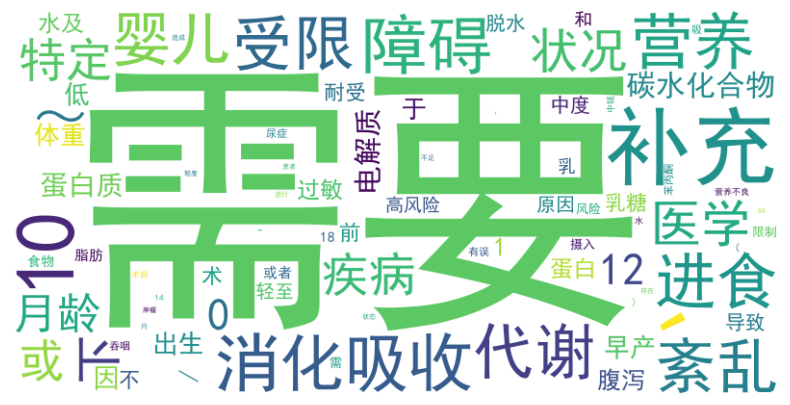

In [32]:
from wordcloud import WordCloud
from collections import Counter
import jieba
# 步骤 1：分词处理
# 将所有句子连接为一个大文本，并用 jieba 分词
text = ' '.join(data2_excel['适用人群'])
words = jieba.lcut(text)

# 去除无意义词语
stopwords = {'的', '以上', '等', '及', '人群', '岁'}

# 过滤无意义词语
words = [word for word in words if word not in stopwords]
word_counts = Counter(words)


# 步骤 2：统计词频
# 使用 Counter 统计词频
word_counts = Counter(words)

# 步骤 3：生成词云
# 使用 WordCloud 绘制词云图，指定中文字体路径
wordcloud = WordCloud(font_path='simhei.ttf', width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

# 显示词云
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(os.path.join(image_dir, 'task2_5.png'))
plt.show()